# ABA and NBA Player Data Analysis

In [1]:
import math
import pandas
import seaborn
import matplotlib.pyplot as plt

pandas.options.display.max_columns = None
pandas.options.display.max_rows = None
seaborn.set(rc={'figure.figsize':(10,10)})

# data spans from ABA and NBA (1948 to current [June 2022])
nba_players = pandas.read_csv("../datasets/clean_aba_nba.csv")

nba_players.head(10)

,Player,From,To,Years,Pos,Ht,Height,Wt,G,PTS,TRB,AST,FG%,FG3%,FT%,eFG%,PER,WS,All Star,All NBA,All ABA,All Rookie,All Defensive,BLK Champ,STL Champ,TRB Champ,AST Champ,Scoring Champ,Most Improved,Sixth Man,DPOY,ROY,AS MVP,CF MVP,Finals MVP,MVP,Championships,NBA 75 Team,ABA All-Time Team
0,Alaa Abdelnaby,1991,1995,5,F-C,6-10,6.833333,240.0,256,5.7,3.3,0.3,50.2,0.0,70.1,50.2,13.0,4.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Zaid Abdul-Aziz,1969,1978,10,F-C,6-9,6.750000,235.0,505,9.0,8.0,1.2,42.8,17.7,72.8,48.4,15.1,17.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Kareem Abdul-Jabbar*,1970,1989,20,C,7-2,7.166667,225.0,1560,24.6,11.2,3.6,55.9,5.6,72.1,55.9,24.6,273.4,19,15,0,1,11,4,0,1,0,2,0,0,0,1,0,0,2,6,6,1,0
3,Mahmoud Abdul-Rauf,1991,2001,11,G,6-1,6.083333,162.0,586,14.6,1.9,3.5,44.2,35.4,90.5,47.2,15.4,25.2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Tariq Abdul-Wahad,1998,2003,6,F,6-6,6.500000,223.0,236,7.8,3.3,1.1,41.7,23.7,70.3,42.2,11.4,3.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Shareef Abdur-Rahim,1997,2008,12,F,6-9,6.750000,225.0,830,18.1,7.5,2.5,47.2,29.7,81.0,47.9,19.0,71.2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Tom Abernethy,1977,1981,5,F,6-7,6.583333,220.0,319,5.6,3.2,1.2,49.2,0.0,74.7,49.2,12.9,13.4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Forest Able,1957,1957,1,G,6-3,6.250000,180.0,1,0.0,1.0,1.0,0.0,27.9,73.7,44.1,-41.5,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,John Abramovic,1947,1948,2,F,6-3,6.250000,195.0,56,9.5,3.0,0.7,23.7,23.4,68.6,45.3,10.9,-1.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Álex Abrines,2017,2019,3,G-F,6-6,6.500000,200.0,174,5.3,1.4,0.5,38.7,36.8,88.0,52.5,8.8,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<hr>

# The Features of the Dataset (each column label) 

<h3><font color='red'> Player → The name of the player </font></h3>
<h3><font color='red'> From → The year the player was drafted </font></h3>
<h3><font color='red'> To → The year the player retired </font></h3>
<h3><font color='red'> Pos → The position the player player (guard, forward, or center) </font></h3>
<h3><font color='red'> Ht → The player's height (height and inches) </font></h3>
<h3><font color='red'> Height → The player's height (feet only, decimal values) </font></h3>
<h3><font color='red'> Wt → The player's weight in pounds </font></h3>
<h3><font color='red'> G → The number of NBA games the player participated in </font></h3>
<h3><font color='red'> PTS → The player's career average for points scored per game </font></h3>
<h3><font color='red'> TRB → The player's career average for total rebounds per game </font></h3> 
<h3><font color='red'> AST → The player's career average for assist given per game </font></h3>
<h3><font color='red'> FG% → The player's career field goal percentage (how many shots they made over how many they attempted)</font></h3>
<h3><font color='red'> FG3% → The player's career three point field goal percentage (how many three point shots they made over how many they attempted)</font></h3>
<h3><font color='red'> FT% → The player's career free throw shooting percentage (how many free throws they made over how many they attempted)</font></h3>
<h3><font color='red'> eFG% → The player's career effective field goal percentage. This is an advanced NBA statistic which accounts for the fact that a three-point field shot is worth more than a two-pointer. The formula is (FGM + 0.5 * 3PM) / FGA.</font></h3>
<h3><font color='red'> PER → The player's career player efficiency rating. This is an advance NBA statistic that outputs a per-minute rating developed by ESPN.com columnist John Hollinger. In John's words, "The PER sums up all a player's positive accomplishments, subtracts the negative accomplishments, and returns a per-minute rating of a player's performance."</font></h3>
<h3><font color='red'> WS → The player's career total win shares. This is an advance NBA statistic estimating how many wins a player is responsible for on his team. Usually, this number is calculated using an entire season’s worth of games for a team. In each win for that season, the amount each player was responsible for is set aside using other advanced metrics.</font></h3>
<h3><font color='red'> All Star → The number of All-Star team selections the player earned during their career</font></h3>
<h3><font color='red'> All NBA → The number of All-NBA team selections the player earned during their career</font></h3>
<h3><font color='red'> All ABA → The number of All-ABA team selections the player earned during their career</font></h3>
<h3><font color='red'> All Rookie → Did this player make the All-Rookie team their first season in the league? (O = yes , 1 = no)</font></h3>
<h3><font color='red'> All Defensive → The number of All-Defensive team selections the player earned during their career</font></h3>
<h3><font color='red'> BLK Champ → The number of times the player lead the league in blocks per game</font></h3>
<h3><font color='red'> STL Champ → The number of times the player lead the league in steals per game</font></h3>
<h3><font color='red'> TRB Champ → The number of times the player lead the league in rebounds per game</font></h3>
<h3><font color='red'> AST Champ → The number of times the player lead the league in assists per game</font></h3>
<h3><font color='red'> Scoring Champ → The number of times the player lead the league in points per game</font></h3>
<h3><font color='red'> Most Improved → Did this player ever receive the Most Improved Player award? (O = yes , 1 = no)</font></h3>
<h3><font color='red'> Sixth Man → The number of times the player won the sixth man of the year award</font></h3>
<h3><font color='red'> DPOY → The number of times the player won the defensive player of the year award</font></h3>
<h3><font color='red'> ROY → Did this player receive the Rookie of the Year award their first season? (O = yes , 1 = no)</font></h3>
<h3><font color='red'> AS MVP → The number of times the player was selected as the MVP of the All-Star game</font></h3>
<h3><font color='red'> CF MVP → The number of times the player was selected as the MVP of a conference finals playoff series</font></h3>
<h3><font color='red'> Final MVP → The number of times the player was selected as the MVP of the NBA Finals playoff series</font></h3>
<h3><font color='red'> MVP → The number of times the player was selected as the MVP of league during the regular season</font></h3>
<h3><font color='red'> Championships → The number of times the player was on a team that won the NBA Finals</font></h3>
<h3><font color='red'> NBA 75 Team → Was this player selected as one of the 75 greatest basketball players of all time? (O = yes , 1 = no)</font></h3>
<h3><font color='red'> ABA All-Time Team → Was this player selected as one of the greatest basketball players to play in the ABA? (O = yes , 1 = no)</font></h3>

<hr>

# Question 1: Is it better for a point guard to score more points or to get more assist ?
* we can look at some of the advanced stats in comparison to the number of points and assist a guard may get
* we will have to seperate our data into just the guard position

In [2]:
# find any player who was considered a guard since our data is split into guards forwards and centers (we will be excluding guard/forward hybrids as it is unlikely they play a primary point guard role)
guards = nba_players[nba_players["Pos"] == "G"]

# slice dataframe to get columns of concern: pts, ast, we will also use the NBA advanced stats to determine how having higher of either of these stats impacts a team

q1_data = guards[["Player", "Pos", "PTS", "AST", "PER", "WS" ]]

q1_data.head(10)

,Player,Pos,PTS,AST,PER,WS
3,Mahmoud Abdul-Rauf,G,14.6,3.5,15.4,25.2
7,Forest Able,G,0.0,1.0,-41.5,0.0
11,Alex Acker,G,2.7,0.5,8.5,-0.2
12,Don Ackerman,G,1.5,0.8,1.0,-0.6
19,Hassan Adams,G,2.5,0.2,11.8,0.8
20,Jaylen Adams,G,2.7,1.6,7.0,0.0
21,Jordan Adams,G,3.2,0.6,13.1,0.4
22,Michael Adams,G,14.7,6.4,16.6,46.9
27,Rick Adelman*,G,7.7,3.5,11.3,10.0
30,Maurice Ager,G,2.1,0.2,2.8,-0.9


<AxesSubplot: >

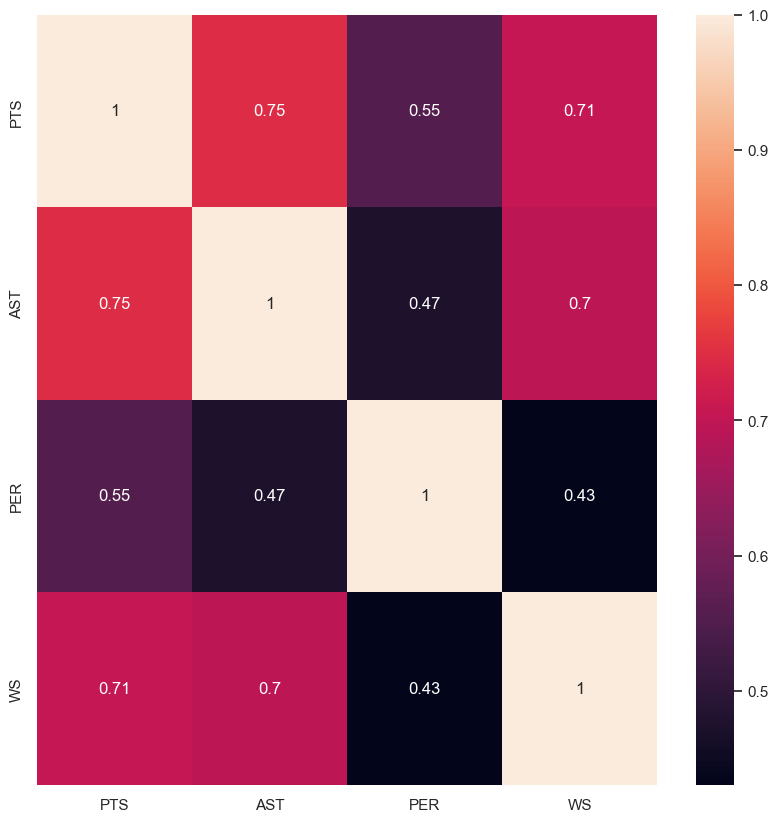

In [3]:
# we can use a heatmap to see which variable between PTS and AST has a stronger correlation / influence over our advanced stats

seaborn.heatmap(q1_data.corr(), annot = True, cmap = 'rocket')

## Based on our heatmap we can see that both points and assist have a very similar correlation with Win Shares (.71 and .7 respectively). There is a bigger difference in the correlations with PER, although the difference is still not a major one. The correlation between points and PER is .55 while it is .47 between assist and PER. Based on this, while the difference may be small, scoring more points seems to be more favorable. 

## However, this is dependant upon how you define "better". If better means more wins, you would value the correlation between the stats and WS. This difference is negligable. This shows that scoring or passing may be needed for you to win, depending upon your team's style of play and your opponent. However, if you value personal stats more, then you'll probably give more stock to the correlation between the stats and PER.

<hr>

# Question 2: If a guard scores more points, do they in turn give out less assist?

* focusing on guard position
* points
* assist
* correlation -- expecting negative correlation

## Looking at our heatmap for the guards data from above we actually see of positive correlation between points and assist at 0.75. Initially I thought the correlation would be negative. I thought that if you focus more on scoring than you would give out less assist. We can use some other visualizations to try to investigate further.

<AxesSubplot: xlabel='Player'>

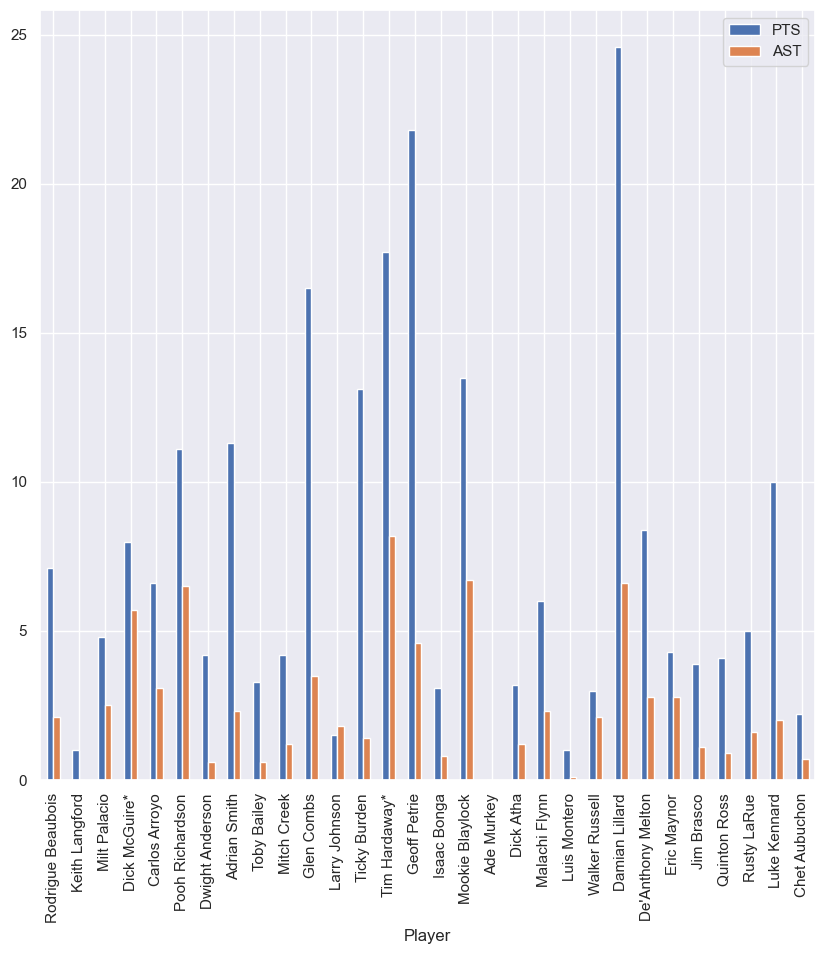

In [4]:
guards.sample(30).plot(x="Player", y=["PTS", "AST"], kind="bar", figsize=(10, 10))

## After evaluating several random samples inside the bar graph above, it is clear that general if someone scores more from the guard position they tend to get more assist. However, the increase in assist starts to decrease as scoring increases. There are outliers, but most guards who show a lot of scoring usually don't go about about 7 assist per game. This is probably more a reflection of the relationship between how much time they play and how much of each stat they are able to produce. If you are scoring more, then you are probably playing more minutes. If you are playing more minutes, then you also have more opportunities to get assist.

<hr>

# Question 3: Does a player's height have any effect on that player's shooting averages, like say their free-throw percentage?

* players name
* players height
* players shooting averages
* looking for correlation

In [5]:
# slice the data to get only features of concern
q3_data = nba_players[["Player", "Height", "FT%", "FG%", "FG3%"]]

q3_data.head(10)

,Player,Height,FT%,FG%,FG3%
0,Alaa Abdelnaby,6.833333,70.1,50.2,0.0
1,Zaid Abdul-Aziz,6.750000,72.8,42.8,17.7
2,Kareem Abdul-Jabbar*,7.166667,72.1,55.9,5.6
3,Mahmoud Abdul-Rauf,6.083333,90.5,44.2,35.4
4,Tariq Abdul-Wahad,6.500000,70.3,41.7,23.7
5,Shareef Abdur-Rahim,6.750000,81.0,47.2,29.7
6,Tom Abernethy,6.583333,74.7,49.2,0.0
7,Forest Able,6.250000,73.7,0.0,27.9
8,John Abramovic,6.250000,68.6,23.7,23.4
9,Álex Abrines,6.500000,88.0,38.7,36.8


<AxesSubplot: >

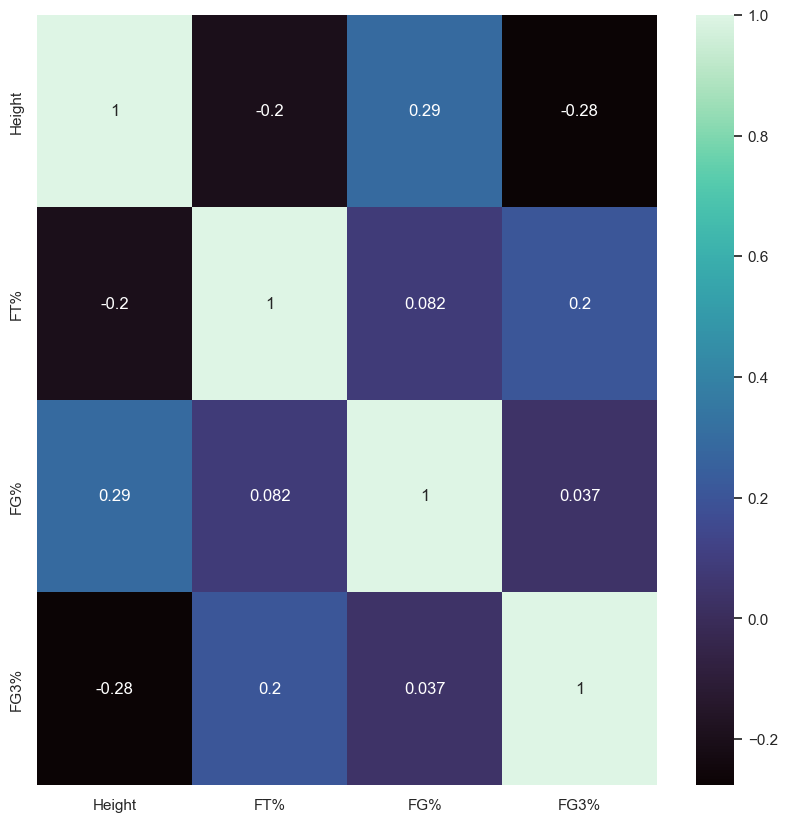

In [6]:
# visualize the sliced data to show correlation
seaborn.heatmap(q3_data.corr(), annot = True, cmap = 'mako')

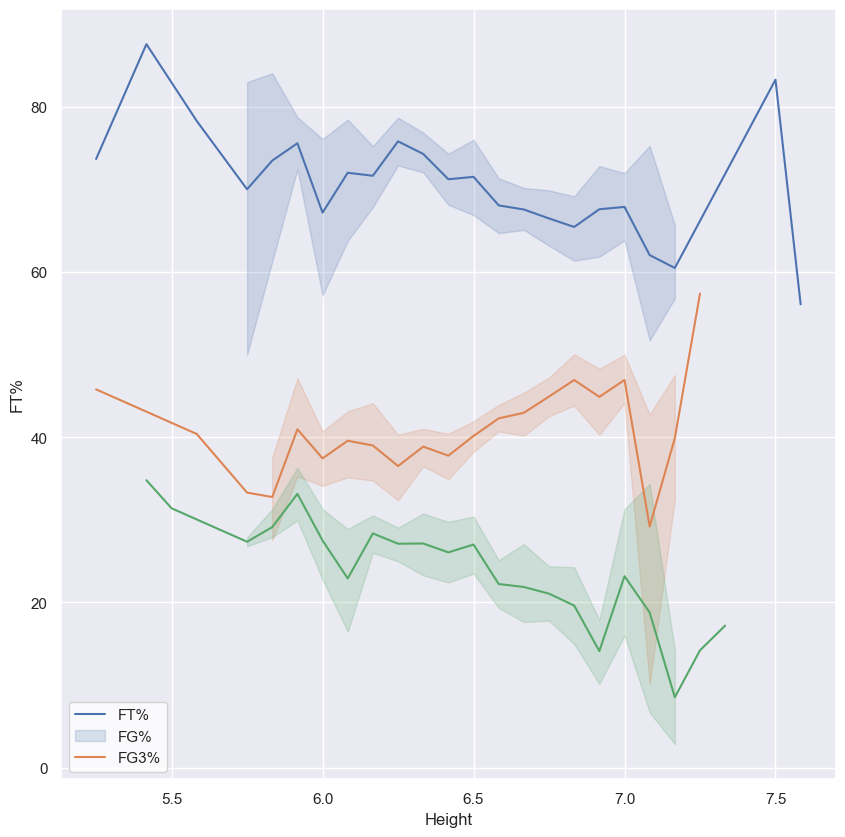

In [7]:
# visualize the sliced data to show height to shooting average mapping

fig, ax = plt.subplots(figsize=(10, 10))

g = seaborn.lineplot(x=q3_data["Height"].sample(500), y = q3_data["FT%"], ax = ax)
g2 = seaborn.lineplot(x=q3_data["Height"].sample(500), y = q3_data["FG%"], ax = ax)
g3 = seaborn.lineplot(x=q3_data["Height"].sample(500), y = q3_data["FG3%"], ax = ax)

ax.legend(['FT%', 'FG%', "FG3%"], facecolor='w')

plt.show()

## Through my analysis I have found that it seems that generally as players' height increases then their free throw shooting percentage tends to decrease, if only slightly. Through careful obesrvation on the displayed linegraph, anomalies of taller players with better shooting averages can be found. However, through analysis of several random samples, there is mostly a negative correlation between a player's height and their free throw percentage, indicated by line sloping downward and the -0.2 correlation value given in the heatmap. Similarly, there is a negative correlation between a player's height and their three point percentage as well (-0.28).

## However, it seems like there is a positive correlation between height and FG%. This is probably because taller basketball players tend to take more shots closer to the basket, since they are the ones rebounding and its easiest for them to dunk. This is why a forward or a center usually leads the NBA in field goal percentage.

<hr>

# Question 4: Is there any correlation between a player's free-throw percentage and their three-point shooting percentage? If so, is it positive or negative?

* we can use the previous data splits and visualizations here as they pertain to shooting percentages

## Looking at the previously used heatmap in question 2, we can also see the correlation between a player's free throw shooting and three point shooting. While there is only a slight correlation, 0.2, it is positive. This suggest that if you shoot free throws better than you are slightly more likely to shoot three pointers better also.

<hr>

# Question 5: What position is the most efficient at scoring in the NBA?

* our dataset consist of five different classifications for a players position: 'G' (guard), 'F' (forward), 'C' (center), 'G-F' (guard hybrid), 'F-C' (forward hybrid)
* we will treat each of these classifications as a different position
* comparing the 'eFG%' of each position

In [8]:
# first we should find the average eFG% for each position

guard_avg = nba_players[nba_players["Pos"] == "G"]["eFG%"].mean()
forward_avg = nba_players[nba_players["Pos"] == "F"]["eFG%"].mean()
center_avg = nba_players[nba_players["Pos"] == "C"]["eFG%"].mean()
g_hybrid_avg = nba_players[nba_players["Pos"] == "G-F"]["eFG%"].mean()
f_hybrid_avg = nba_players[nba_players["Pos"] == "F-C"]["eFG%"].mean()

# print averages with respective labels

print("Guard Average: {}\nForward Average: {}\nCenter Average: {}\nGuard Hybrid Average: {}\nForward Hybrid Average: {}".format(guard_avg, forward_avg, center_avg, g_hybrid_avg, f_hybrid_avg))

Guard Average: 44.08194986072424
Forward Average: 45.28369188063845
Center Average: 45.92725563909774
Guard Hybrid Average: 47.106331168831176
Forward Hybrid Average: 48.43536776212832


## Based on these averages, the two hybrid positions actually have the highest effective field goal percentages. The forward hybrids' 48.44 average is slightly above the guard hybrids' 47.11 average. So players who have the "F-C" label tend to have higher effective field goal percentages. This speaks a lot to the nature of today's game. Positionless basketball and versatility are becoming more and more valuable in the professional league. Having players who can fill multiple roles lends toward success for both the team and the individual.

<hr>

# Question 6: What position is the most prolific with scoring in the NBA?

* we will use the same five position classifications from above
* we will need to find the total number of points scored instead of just using averages

In [9]:
# iterate dataframe to get total points for each players

pts_list = []

for index, row in nba_players.iterrows():
    total_pts = int(row["PTS"] * row["G"])
    pts_list.append(total_pts)

# create total_pts column in dataframe

nba_players["TOTAL_PTS"] = pts_list

# seperate players by positions

guards = nba_players[ nba_players['Pos'] == "G"]
forwards = nba_players[ nba_players['Pos'] == "F" ]
centers = nba_players[ nba_players['Pos'] == "C" ]
g_hybrids = nba_players[ nba_players['Pos'] == "G-F" ]
f_hybrids = nba_players[ nba_players['Pos'] == "F-C" ]

g_pts = math.ceil(guards['PTS'].sum())
f_pts = math.ceil(forwards['PTS'].sum())
c_pts = math.ceil(centers['PTS'].sum())
gh_pts = math.ceil(g_hybrids["PTS"].sum())
fh_pts = math.ceil(f_hybrids["PTS"].sum())

# print averages with respective labels

print("Guard Total: {}\nForward Total: {}\nCenter Total: {}\nGuard Hybrid Total: {}\nForward Hybrid Total: {}".format(g_pts, f_pts, c_pts, gh_pts, fh_pts))

Guard Total: 11324
Forward Total: 7717
Center Total: 2750
Guard Hybrid Total: 5287
Forward Hybrid Total: 5128


## We can see here that the guard position has scored the most total points at 11,323. The next closest is forwards at 7,716.

<hr>

# Question 7: It has always been said that if you "feed the big man" they will be more productive. Do forwards in the league who score more also get more rebounds?
 * we can do a similar approach like question 1 but focus on forwards and centers instead of guards

In [10]:
# find any player who was considered a forward or center
frontcourt_players = nba_players[ nba_players["Pos"].str.contains("F") | nba_players["Pos"].str.contains("C") ]

# slice new data for columns of concern: pts, reb

q7_data = frontcourt_players[["Player", "PTS", "TRB"]]

q7_data.head(10)

,Player,PTS,TRB
0,Alaa Abdelnaby,5.7,3.3
1,Zaid Abdul-Aziz,9.0,8.0
2,Kareem Abdul-Jabbar*,24.6,11.2
4,Tariq Abdul-Wahad,7.8,3.3
5,Shareef Abdur-Rahim,18.1,7.5
6,Tom Abernethy,5.6,3.2
8,John Abramovic,9.5,3.0
9,Álex Abrines,5.3,1.4
10,Precious Achiuwa,7.2,5.1
13,Mark Acres,3.6,4.1


<AxesSubplot: >

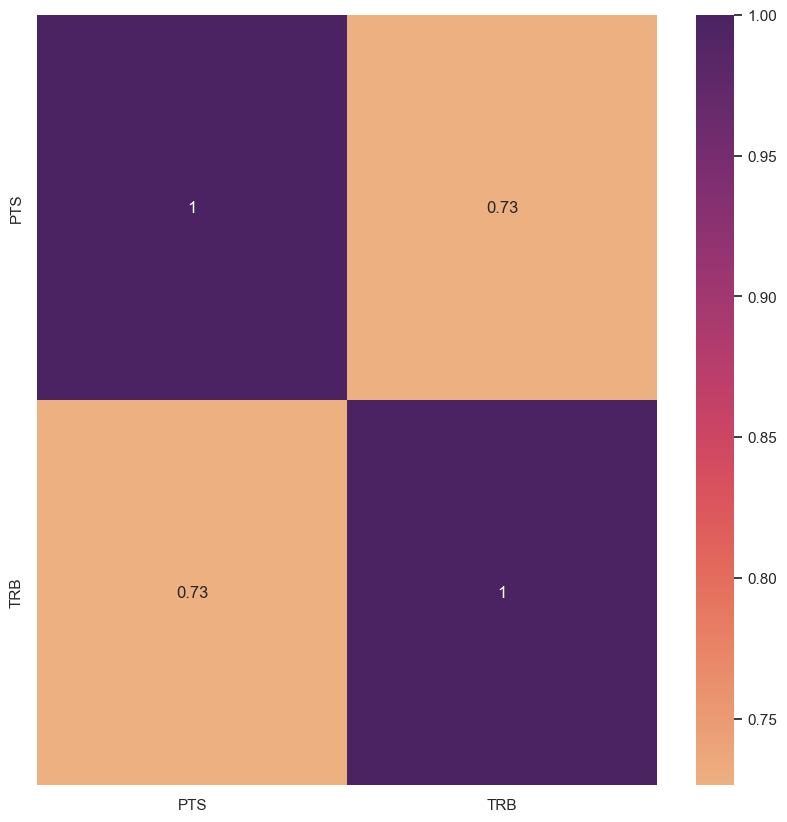

In [11]:
# we can check correlation with a heatmap once again

seaborn.heatmap(q7_data.corr(), annot = True, cmap = 'flare')

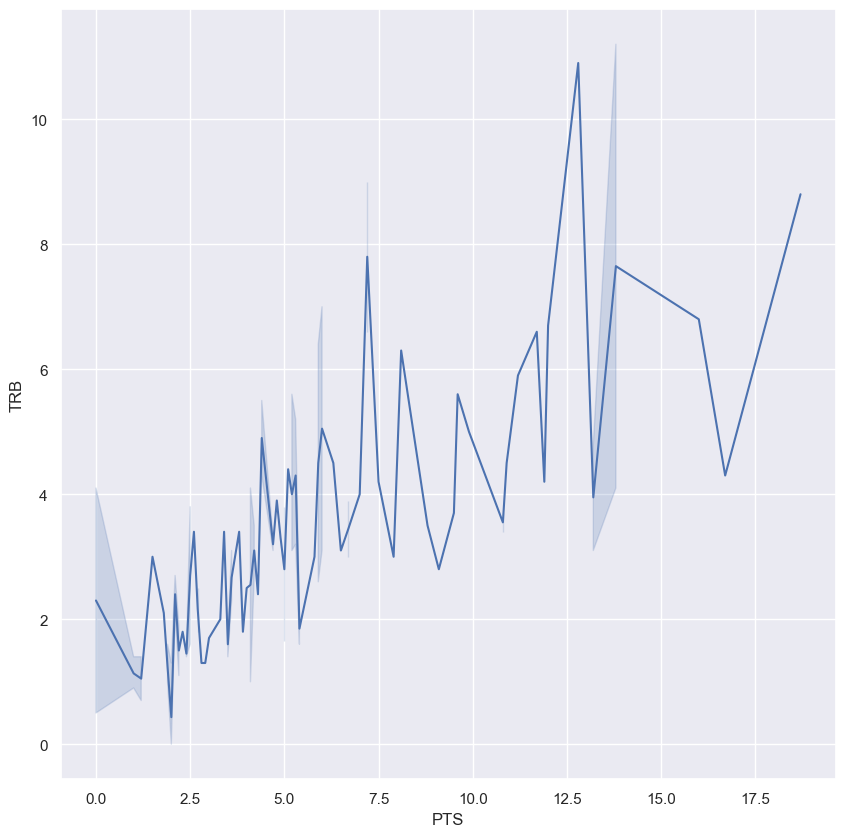

In [12]:
# like before we can use a line graphe for more visualization to support of conclusion

fig, ax = plt.subplots(figsize=(10, 10))

g = seaborn.lineplot(x=q7_data["PTS"].sample(100), y = q7_data["TRB"], ax = ax)

plt.show()

## Based on the strong positive correlation (0.73) and the positive sloping line within the graph, we can conclude that players who score more probably grab more rebounds as well. This is probably due to the same reasons as guards getting more assist as they score more. So again, this is probably more insight into the relationship between playing time and rebounds more so than points and rebounds.